# Tiltshift video

Autor: Almir Soares Firmo Filho

O objetivo desse notebook é aplicar o código Tiltshift à um vídeo para dar a ele o efeito de miniatura. Além disso, apesar de exibir o vídeo em numa determinada taxa (digamos, 60 quadros por segundo), ocorre a repetição de um mesmo frame por mais de um tempo de quadro, para dar a sensação de um vídeo stop motion.

O ponto de partida será um vídeo feito de um dos lugares mais visitados de longe: a Tower Bridge.

In [20]:
from IPython.display import YouTubeVideo

YouTubeVideo('QbaLdeu-l9o')

Utilizaremos o efeito de Tiltshift para tentar fazer com que a cena se pareça com um vídeo capturado a partir de uma miniatura (ou uma maquete) da cidade de Londres.

Portanto, começaremos importando as bibliotecas necessárias:

In [ ]:
# Importar bibliotecas
import cv2 as cv
import numpy as np

Declararemos agora um objeto de captura de vídeo, que pode ser uma webcam, por exemplo, ou como nesse caso um vídeo local:

In [ ]:
# Criar objeto de captura de vídeo
cap = cv.VideoCapture('london_2.mkv')

A partir desse objeto podemos definir variáveis importantes a respeito do vídeo, como altura e largura dos frames:

In [ ]:
# Definir altura e largura dos frames com base no objeto 'cap'
width = int(cap.get(3))
height = int(cap.get(4))

Definimos, portanto, os parâmetros do efeito de tiltshift:

In [ ]:
# Definir parâmetros do tiltshift
d = 2
L = (65/100)*height
L1 = L/2
L2 = height - L1
C = -50

Criamos a matriz $\alpha(x)$:

In [ ]:
# Criar matriz Alpha
x = np.arange(0,height,1)
alpha = (np.tanh((x-L1-C)/d) - np.tanh((x-L2-C)/d))/2
alpha = alpha.reshape(-1,1,1)
alpha_mat = np.tile(alpha,(1,width,3))

Agora definimos o objeto de captura de vídeo, no qual especificamos:

- Nome do vídeo;
- Tipo de codec;
- FPS;
- Altura e largura do vídeo;

In [ ]:
# Criar objeto "escritor de vídeo"
out = cv.VideoWriter('london_stopMotion.mkv',cv.VideoWriter_fourcc('M','J','P','G'), 60, (width,height))

Agora, na função principal, escolhemos alguns frames para exibir na saída por mais tempo do que o tempo de um quadro e após o último frame ser processado tanto o objeto escritor de vídeo quando o objeto de captura são dispensados.

In [ ]:
# Iniciar variável de controle para atualização de frame de saída
show_frame = 0

while(cap.isOpened()):
    
    # Recebe confirmação de que há frames ainda a serem lidos (ret) e o frame em si (frame) a partir do objeto de captura
    ret, frame = cap.read()
    
    # Sai do loop caso todos os frames tenham sido lidos
    if ret == False:
        break

    # Processa e atualiza o frame que será escrito a cada 6 tempos de quadro
    if show_frame == 0:
        frame1 = frame.copy()
        proc_frame = np.multiply(alpha_mat,frame1) + np.multiply(1 - alpha_mat,cv.blur(frame1, (5,5)))
        proc_frame = proc_frame.astype(np.uint8)

    if show_frame < 6:
        show_frame += 1
    else:
        show_frame = 0

    # Escreve o frame processado no arquivo de saída
    out.write(proc_frame)

# Libera os objetos criados
out.release()
cap.release()

Ao fim, temos como saída o seguinte vídeo:

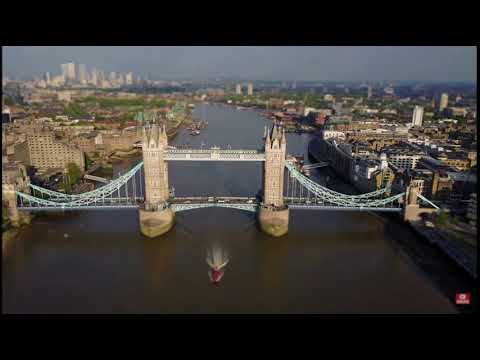

In [21]:
YouTubeVideo('_0YRLHUrAAs')